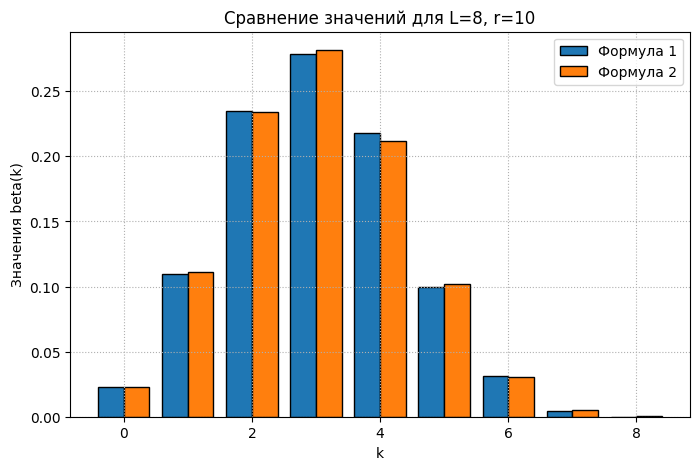

 k | Формула 1 | Формула 2
--------------------------
 0 |       0.02286179        0.02303914
 1 |       0.10963671        0.11097635
 2 |       0.23510635        0.23386902
 3 |       0.27881563        0.28162870
 4 |       0.21817088        0.21196352
 5 |       0.09935975        0.10209990
 6 |       0.03154278        0.03073757
 7 |       0.00450611        0.00528781
 8 |       0.00000000        0.00039798

Расстояние Колмогорова = 0.003114619459112511


In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from math import comb

def formula1(k, r, L):

    if k > r or k > L:
        return 0.0
    
    mnozhitel = (1 / (L**r)) * comb(L, k)
    
    summa = 0.0
    max_i = min(L - k, r - k)
    for i in range(max_i + 1):
        znak = (-1)**i
        faktor = math.factorial(r) / math.factorial(r - k - i)
        stepen = (L - k - i)**(r - k - i) if (L - k - i) >= 0 else 0
        summa += znak * comb(L - k, i) * faktor * stepen

    return mnozhitel * summa

def B(L, r):
    # среднее число ED, успешно завершивших фазу RA
    if r <= 0:
        return 0.0
    return r * ((L - 1) / L)**(r - 1)

def formula2(k, r, L):

    m = min(L, r)
    if m == 0:
        return 1.0 if (k == 0) else 0.0
    
    p = B(L, r) / m
    p = max(0.0, min(1.0, p))
    
    if k > m:
        return 0.0
    return comb(m, k) * (p**k) * ((1 - p)**(m - k))

def main():
    L = 8
    r = 10
    
    m = min(L, r)
    k_values = np.arange(m + 1)
    
    # создание двух массивов 
    values_formula1 = np.array([formula1(k, r, L) for k in k_values])
    values_formula2 = np.array([formula2(k, r, L) for k in k_values])
    
    # нормировка
    values_formula1 /= values_formula1.sum()
    values_formula2 /= values_formula2.sum()
    
    # расстояние Колмогорова 
    cdf_formula1 = np.cumsum(values_formula1)
    cdf_formula2 = np.cumsum(values_formula2)
    d_kolm = np.max(np.abs(cdf_formula1 - cdf_formula2))
    

    bar_width = 0.4
    plt.figure(figsize=(8, 5))
    
    plt.bar(k_values - bar_width/2, values_formula1, width=bar_width, 
            label='Формула 1', edgecolor='black')
    plt.bar(k_values + bar_width/2, values_formula2, width=bar_width, 
            label='Формула 2', edgecolor='black')
    
    plt.title(f"Сравнение значений для L={L}, r={r}")
    plt.xlabel("k")
    plt.ylabel("Значения beta(k)")
    plt.grid(True, linestyle=':')
    plt.legend()
    plt.show()
    
    print(" k | Формула 1 | Формула 2")
    print("--------------------------")
    for k, v1, v2 in zip(k_values, values_formula1, values_formula2):
        print(f"{k:2d} | {v1:16.8f}  {v2:16.8f}")
    
    print("\nРасстояние Колмогорова =", d_kolm)

if __name__ == "__main__":
    main()
